In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [7]:
X = datasets.load_iris().data
y = datasets.load_iris().target

In [15]:
datasets.load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

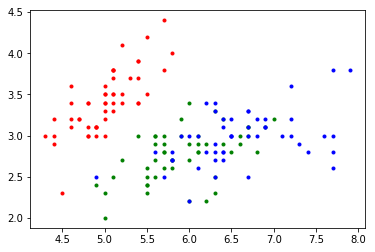

In [13]:
plt.plot(X[y == 0, 0], X[y == 0, 1], '.r')
plt.plot(X[y == 1, 0], X[y == 1, 1], '.g')
plt.plot(X[y == 2, 0], X[y == 2, 1], '.b');

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
pca = PCA(n_components=2, random_state=0)
sc = StandardScaler(with_std=False)
X_f = sc.fit_transform(X)
pca.fit(X_f)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [36]:
X_n = pca.transform(X_f)

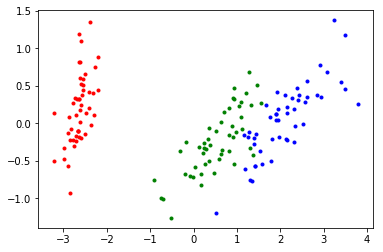

In [37]:
plt.plot(X_n[y == 0, 0], X_n[y == 0, 1], '.r')
plt.plot(X_n[y == 1, 0], X_n[y == 1, 1], '.g')
plt.plot(X_n[y == 2, 0], X_n[y == 2, 1], '.b');

In [29]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [65]:
sc = StandardScaler(with_std=False)
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=False)

In [70]:
cls = DecisionTreeClassifier(max_depth=2)
cls.fit(sc.transform(X_train), y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
preds = cls.predict(sc.transform(X_test))

In [72]:
from sklearn.metrics import log_loss, accuracy_score

In [73]:
accuracy_score(y_test, preds)

0.93333333333333335

In [74]:
pca = PCA(n_components=2, random_state=0)
pca.fit(sc.transform(X_train))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

In [75]:
cls = DecisionTreeClassifier(max_depth=2)
cls.fit(pca.transform(sc.transform(X_train)), y_train)
preds = cls.predict(pca.transform(sc.transform(X_test)))

In [76]:
accuracy_score(y_test, preds)

1.0

In [78]:
X = datasets.load_digits().data

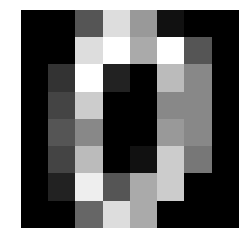

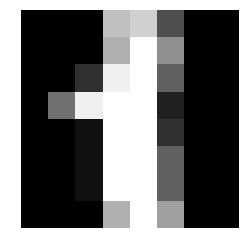

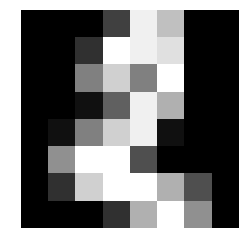

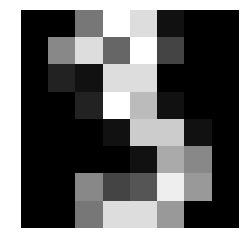

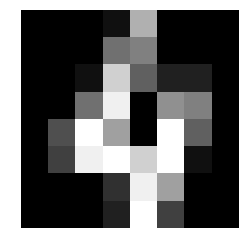

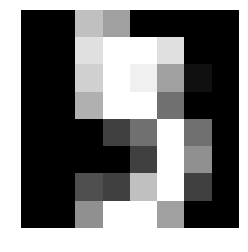

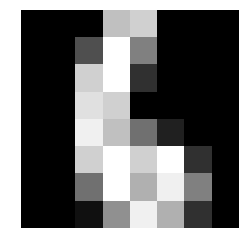

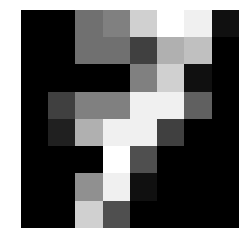

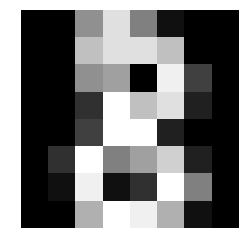

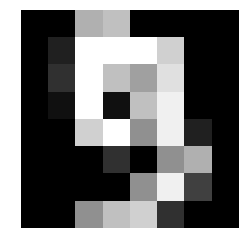

In [91]:
for i in range(10):
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
    plt.show();

In [92]:
sc = StandardScaler(with_std=False)
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=False)

In [93]:
pca = PCA(n_components=2, random_state=0)
pca.fit(sc.transform(X))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

In [95]:
y = datasets.load_digits().target

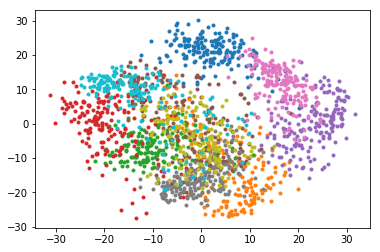

In [96]:
X_p = pca.transform(sc.transform(X))
for i in range(10):
    plt.plot(X_p[y == i, 0], X_p[y == i, 1], '.')

In [97]:
from sklearn.manifold import TSNE

In [98]:
tsne = TSNE()
tsne.fit(X)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)

In [100]:
X_n = tsne.fit_transform(X)

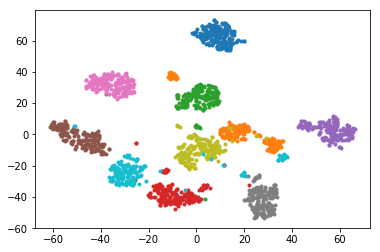

In [101]:
# X_p = pca.transform(sc.transform(X))
for i in range(10):
    plt.plot(X_n[y == i, 0], X_n[y == i, 1], '.')

In [115]:
X = np.zeros((90, 2))

In [116]:
X[:30, 0] = np.random.normal(loc=.0, scale=.1, size=30)
X[:30, 1] = np.random.normal(loc=.0, scale=.1, size=30)
X[30:60, 0] = np.random.normal(loc=1., scale=.1, size=30)
X[30:60, 1] = np.random.normal(loc=.0, scale=.1, size=30)
X[60:, 0] = np.random.normal(loc=.0, scale=.1, size=30)
X[60:, 1] = np.random.normal(loc=1., scale=.1, size=30)

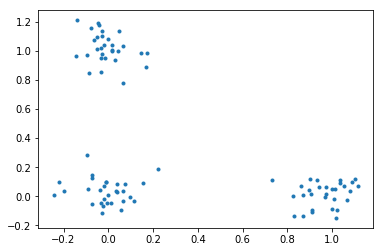

In [118]:
plt.plot(X[:, 0], X[:, 1], '.')

In [119]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [128]:
km = KMeans(n_clusters=5, random_state=0)

In [129]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

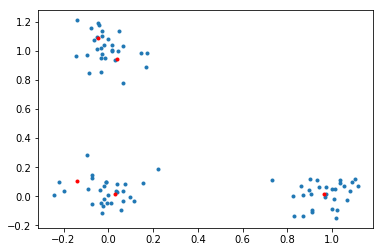

In [130]:
plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], '.r')

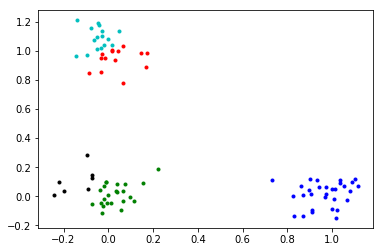

In [132]:
plt.plot(X[km.labels_ == 0, 0], X[km.labels_ == 0, 1], '.r')
plt.plot(X[km.labels_ == 1, 0], X[km.labels_ == 1, 1], '.g')
plt.plot(X[km.labels_ == 2, 0], X[km.labels_ == 2, 1], '.b')
plt.plot(X[km.labels_ == 3, 0], X[km.labels_ == 3, 1], '.c')
plt.plot(X[km.labels_ == 4, 0], X[km.labels_ == 4, 1], '.k')

In [142]:
dists_n = []
for n_clusters in range(2, 20):
    km = KMeans(n_clusters=n_clusters, random_state=0)
    km.fit(X)
    dists = []
    for j in range(n_clusters):
        dist = 0
        for i in X[km.labels_ == j]:
            dist += np.sqrt((i[0] - km.cluster_centers_[j][0])**2 + 
                            (i[1] - km.cluster_centers_[j][1])**2)
        dists.append(dist)
    dists_n.append(np.mean(dists))

In [146]:
dists_n

[16.488062621154029,
 3.342621014065092,
 2.2943892923192446,
 1.7241705766553443,
 1.2819957254518985,
 1.0136006051481388,
 0.8451291439633879,
 0.68940301555832673,
 0.58646242240012447,
 0.4901000411078778,
 0.42865981250916091,
 0.38460223984414516,
 0.32968048613010514,
 0.29792707455860357,
 0.26372729354349073,
 0.24372157334667777,
 0.21615473980199626,
 0.19616197800225404]

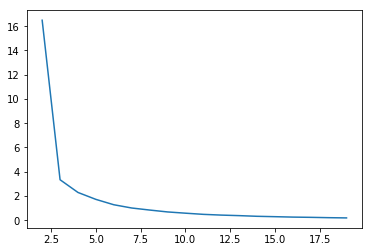

In [150]:
plt.plot(range(2, 20), dists_n)